!pip install numba==0.48 <br>
!pip install librosa <br>
!pip install PyAudio <br>
!pip install numpy <br>
!pip install scikit-learn <br>
!pip install matplotlib <br>

In [1]:
!pip install numba==0.48 

## Feature Extraction basics

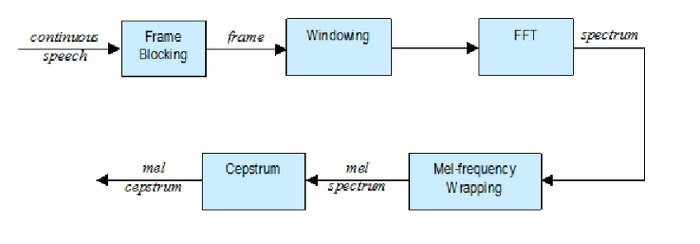

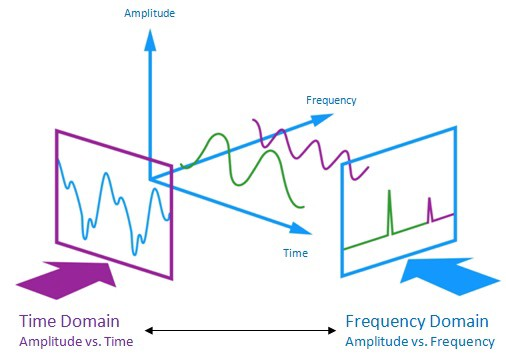

## Including Libraries and packages

In [1]:
import librosa
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

## Loading an audio

In [2]:
audio_path = "example_music.mp3"
x,sr = librosa.load(audio_path)
print(type(x),type(sr))

<class 'numpy.ndarray'> <class 'int'>


## Playing an audio

In [3]:
import IPython.display as ipd

In [4]:
ipd.Audio(audio_path)

## Plot the signal:

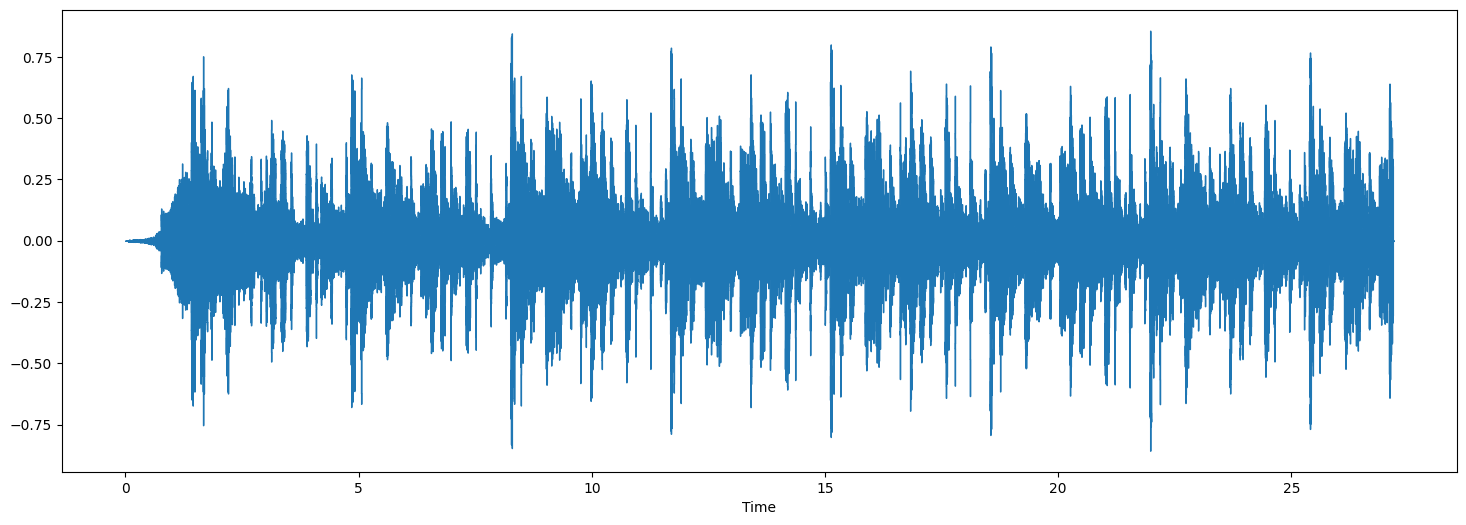

In [6]:
plt.figure(figsize=(18,6))
librosa.display.waveshow(x,sr=sr)
plt.show()

## Display Spectrogram

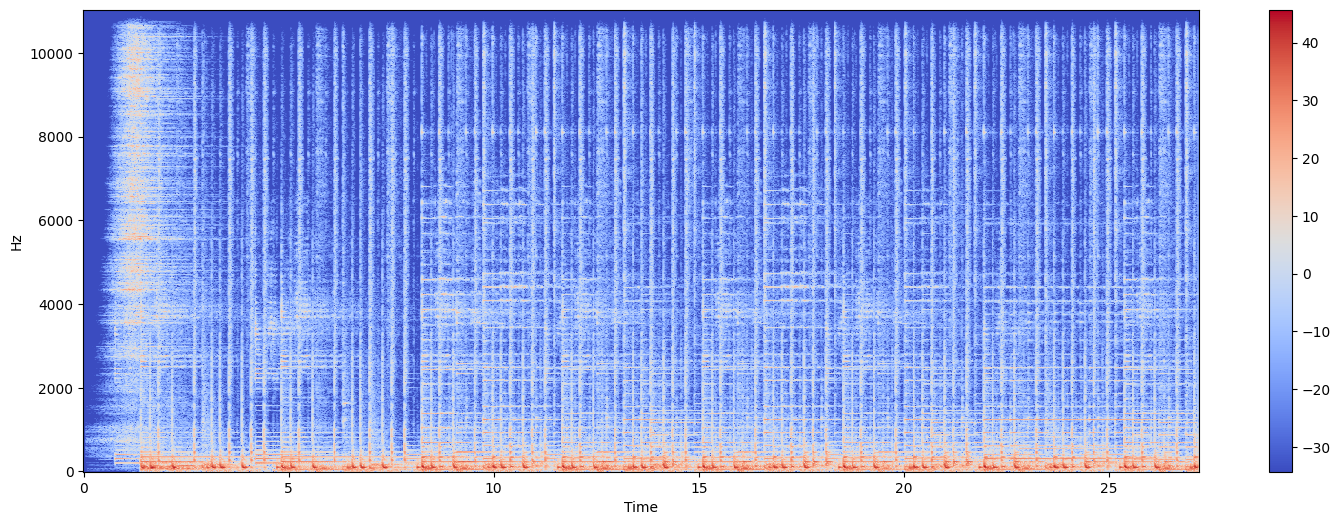

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18,6))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.show()

## Zooming in and find Zero Crossing Rate

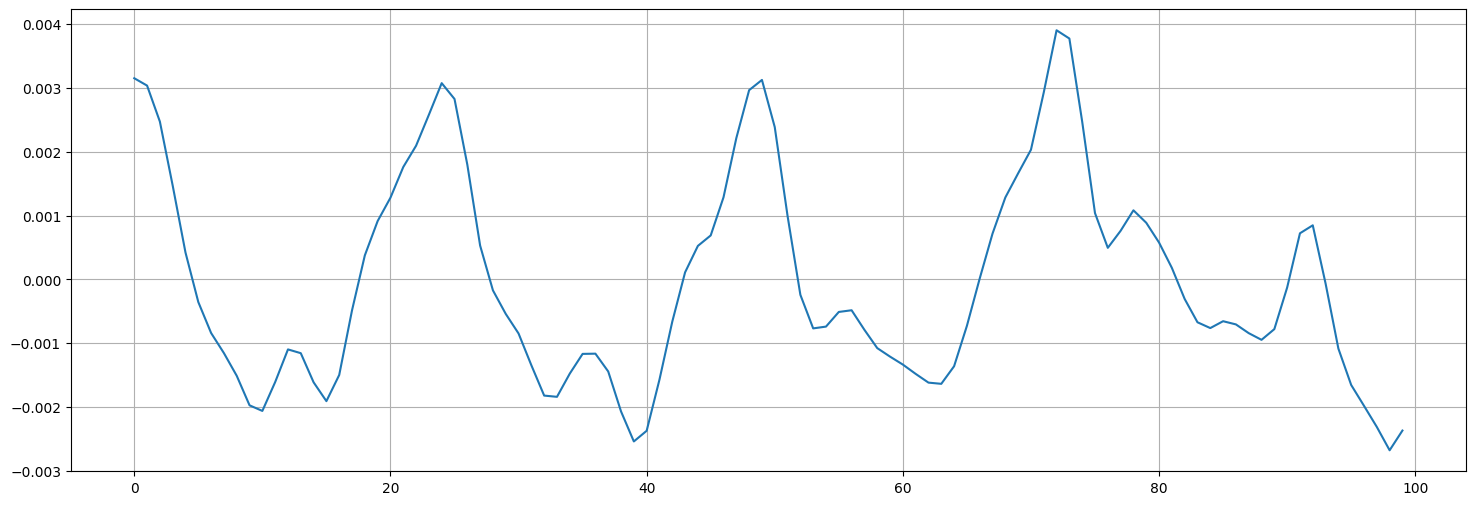

In [8]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(18,6))
plt.plot(x[n0:n1])
plt.grid()

In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1],pad = False)
print(sum(zero_crossings))

9


## spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

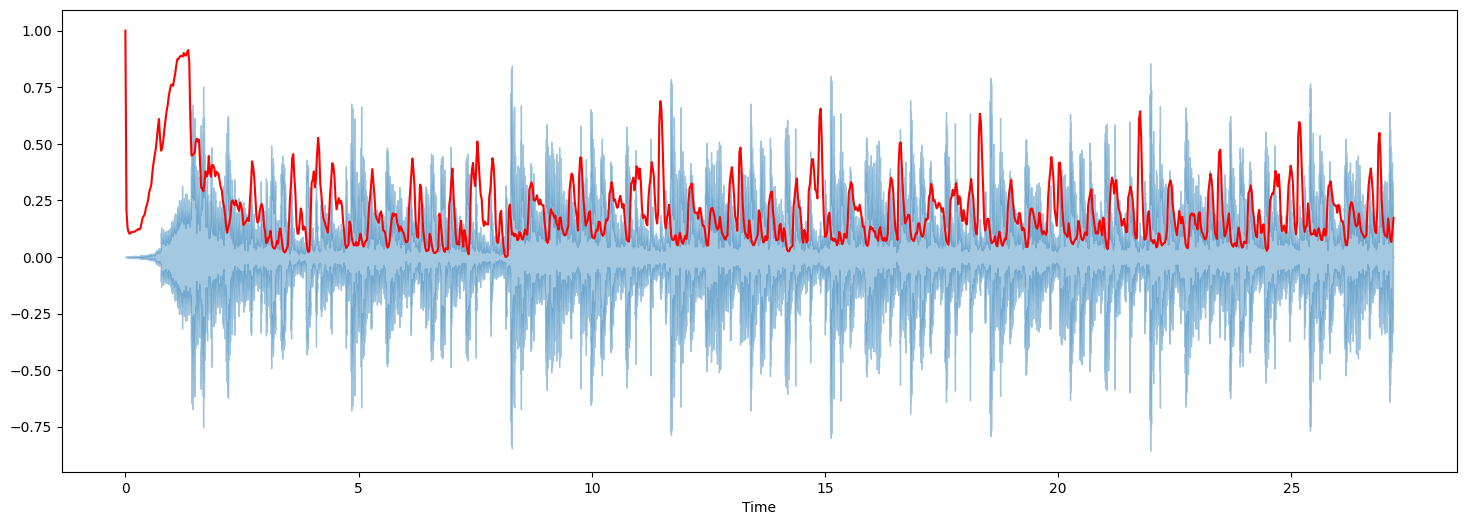

In [13]:
from sklearn.preprocessing import minmax_scale
spectral_centroids = librosa.feature.spectral_centroid(y=x,sr = sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x,axis = 0):
    return minmax_scale(x,axis = axis)
plt.figure(figsize=(18,6))
librosa.display.waveshow(x,sr=sr,alpha = 0.4)
plt.plot(t,normalize(spectral_centroids),color = 'r')
plt.show()

## Spectral Rolloff

[]

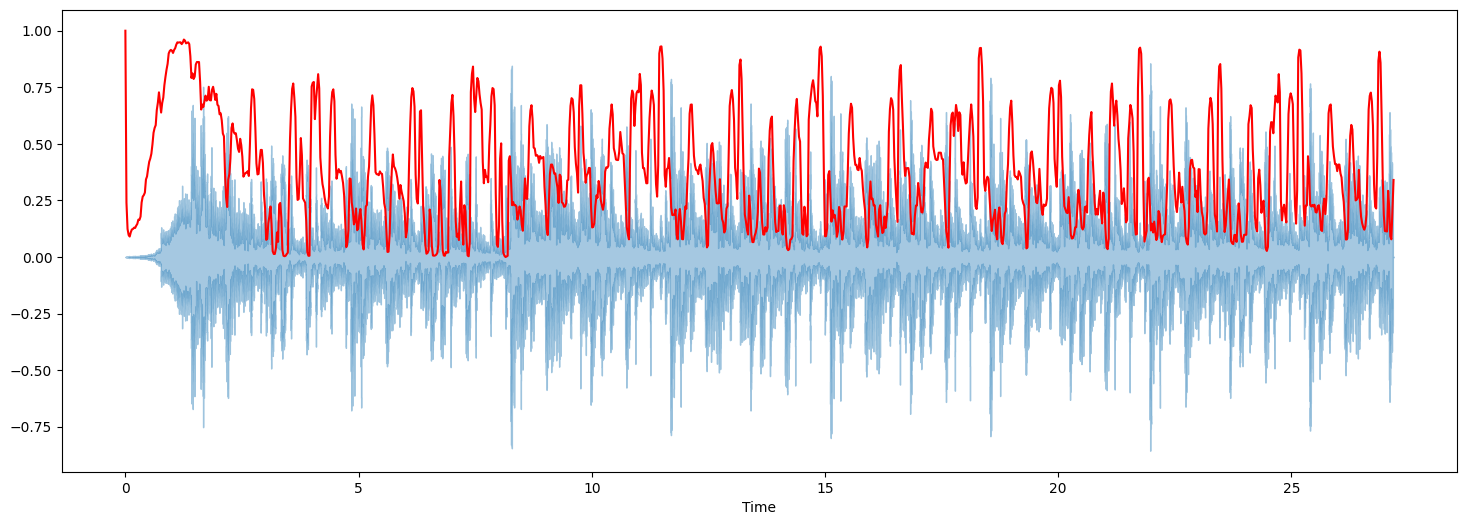

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x,sr=sr)[0]
plt.figure(figsize=(18,6))
librosa.display.waveshow(x,sr=sr,alpha = 0.4)
plt.plot(t,normalize(spectral_rolloff),color='r')
plt.plot()

## MFCC — Mel-Frequency Cepstral Coefficients

(20, 1172)


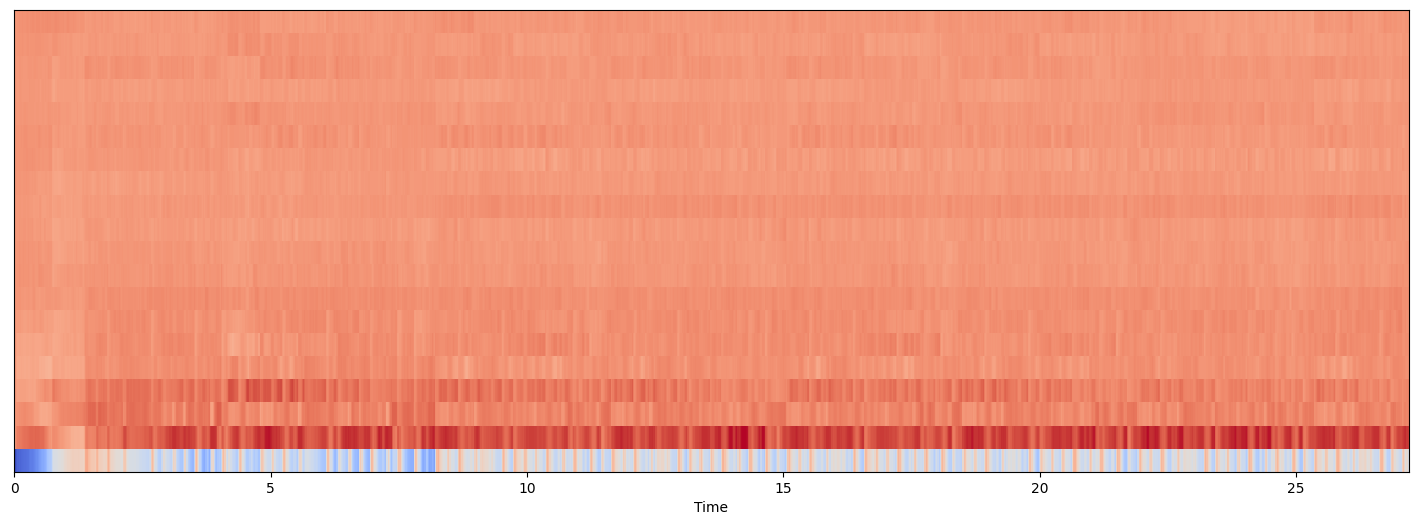

In [18]:
mfcc = librosa.feature.mfcc(y=x,sr=sr)
print(mfcc.shape)
plt.figure(figsize=(18,6))
librosa.display.specshow(mfcc,sr=sr,x_axis='time')
plt.show()